In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SVMSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Train on 189871 samples, validate on 94936 samples
Epoch 1/150
189871/189871 [==============================] - 19s 98us/step - loss: 0.0017 - val_loss: 3.8113e-04
Epoch 2/150
189871/189871 [==============================] - 18s 94us/step - loss: 2.5799e-04 - val_loss: 1.8799e-04
Epoch 3/150
189871/189871 [==============================] - 18s 95us/step - loss: 1.6159e-04 - val_loss: 1.4748e-04
Epoch 4/150
189871/189871 [==============================] - 18s 96us/step - loss: 1.3022e-04 - val_loss: 1.3189e-04
Epoch 5/150
189871/189871 [==============================] - 18s 95us/step - loss: 1.2335e-04 - val_loss: 1.2310e-04
Epoch 6/150
189871/189871 [==============================] - 18s 95us/step - loss: 1.2001e-04 - val_loss: 1.1942e-04
Epoch 7/150
189871/189871 [===================

189871/189871 [==============================] - 19s 100us/step - loss: 3.7418e-05 - val_loss: 4.4052e-05
Epoch 69/150
189871/189871 [==============================] - 19s 100us/step - loss: 3.7335e-05 - val_loss: 4.7180e-05
Epoch 70/150
189871/189871 [==============================] - 19s 99us/step - loss: 3.7267e-05 - val_loss: 4.7492e-05
Epoch 71/150
189871/189871 [==============================] - 19s 99us/step - loss: 3.7183e-05 - val_loss: 3.8827e-05
Epoch 72/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7001e-05 - val_loss: 3.4711e-05
Epoch 73/150
189871/189871 [==============================] - 20s 104us/step - loss: 3.6862e-05 - val_loss: 3.6776e-05
Epoch 74/150
189871/189871 [==============================] - 20s 104us/step - loss: 3.6816e-05 - val_loss: 3.7679e-05
Epoch 75/150
189871/189871 [==============================] - 19s 98us/step - loss: 3.6557e-05 - val_loss: 3.9728e-05
Epoch 76/150
189871/189871 [==============================] - 18

Epoch 137/150
189871/189871 [==============================] - 21s 110us/step - loss: 3.3611e-05 - val_loss: 3.8581e-05
Epoch 141/150
189871/189871 [==============================] - 21s 110us/step - loss: 3.3488e-05 - val_loss: 3.3356e-05
Epoch 142/150
189871/189871 [==============================] - 21s 109us/step - loss: 3.3420e-05 - val_loss: 3.4010e-05
Epoch 143/150
189871/189871 [==============================] - 21s 110us/step - loss: 3.3309e-05 - val_loss: 3.6791e-05
Epoch 144/150
189871/189871 [==============================] - 48s 252us/step - loss: 0.0318 - accuracy: 0.9921 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 2/50
189871/189871 [==============================] - 45s 240us/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 8/50
189871/189871 [==============================] - 42s 221us/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 15/50
189871/189871 [==============================] - 45s

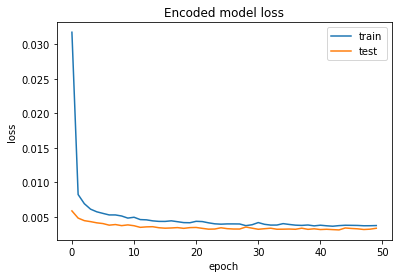

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994206623409455


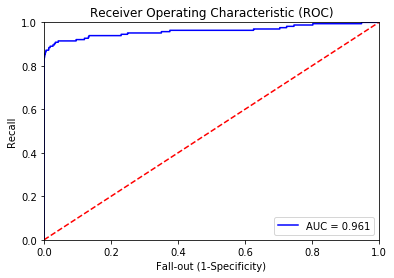

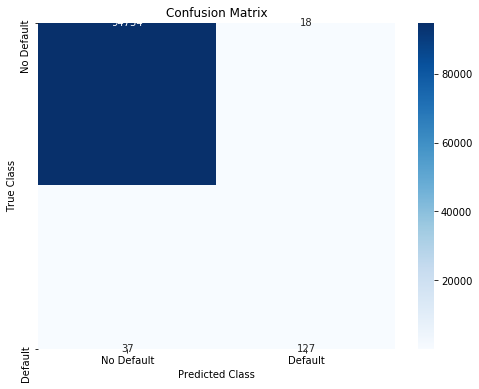

AUC(ROC): 0.8871001571936963
Precision: 0.8758620689655172
Recall: 0.774390243902439
F1 score: 0.8220064724919094
False positives: 18
True positives: 127
False negatives: 37
True negatives: 94754
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Train on 189871 samples, validate on 94936 samples
Epoch 1/150
189871/189871 [==============================] - 20s 105us/step - loss: 0.0022 - val_loss: 3.7848e-04
Epoch 2/150
189871/189871 [==============================] - 19s 103us/step - loss: 2.6091e-04 - val_loss: 2.0690e-04
Epoch 3/150
189871/189871 [==============================] - 22s 116us/step - loss: 1.6950e-04 - val_loss: 1.5223e-04
Epoch 4/150
189871/189871 [==============================] - 21s 110us/step - loss: 1.3746e-04 - val_loss: 1.2770e-04
Epoch 5/150
189871/189871 [==============================] - 21s 110us/step - loss: 1.2369e-04 - val_loss: 1.2360e-04
Epoch 6/150
189871/189871 [==============================] - 21s 109us/step - loss: 1.1933e-04 - val_loss: 1.2358e-04
Epoch 7/150
189871/189871 [=============

Epoch 68/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.2601e-05 - val_loss: 3.7283e-05
Epoch 69/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.2199e-05 - val_loss: 4.4589e-05
Epoch 70/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.2247e-05 - val_loss: 3.9230e-05
Epoch 71/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.2299e-05 - val_loss: 4.0209e-05
Epoch 72/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.2029e-05 - val_loss: 4.2398e-05
Epoch 73/150
189871/189871 [==============================] - 19s 102us/step - loss: 4.1985e-05 - val_loss: 4.2256e-05
Epoch 74/150
189871/189871 [==============================] - 19s 102us/step - loss: 4.2262e-05 - val_loss: 3.9581e-05
Epoch 75/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.1865e-05 - val_loss: 3.6409e-05
Epoch 76/150
189871/189871 [====================

189871/189871 [==============================] - 20s 103us/step - loss: 3.8436e-05 - val_loss: 4.2966e-05
Epoch 137/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7909e-05 - val_loss: 3.7485e-05
Epoch 138/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.8143e-05 - val_loss: 3.8049e-05
Epoch 139/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7943e-05 - val_loss: 3.5330e-05
Epoch 140/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7924e-05 - val_loss: 3.6808e-05
Epoch 141/150
189871/189871 [==============================] - 19s 102us/step - loss: 3.8060e-05 - val_loss: 3.6085e-05
Epoch 142/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7734e-05 - val_loss: 3.3831e-05
Epoch 143/150
189871/189871 [==============================] - 20s 103us/step - loss: 3.7901e-05 - val_loss: 3.6437e-05
Epoch 144/150
189871/189871 [=========================

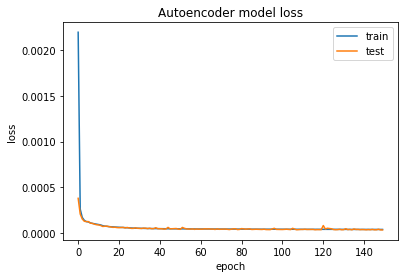

Train on 189871 samples, validate on 94936 samples
Epoch 1/50
189871/189871 [==============================] - 43s 226us/step - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 2/50
189871/189871 [==============================] - 42s 219us/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 3/50
189871/189871 [==============================] - 43s 227us/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 4/50
189871/189871 [==============================] - 43s 225us/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/50
189871/189871 [==============================] - 43s 225us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/50
189871/189871 [==============================] - 43s 224us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 7/50
189871/189871 [=================

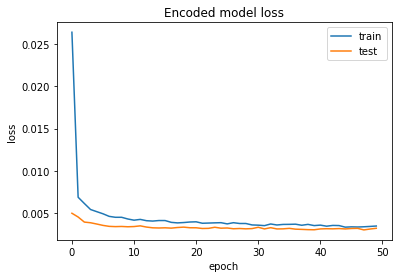

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999389062104997


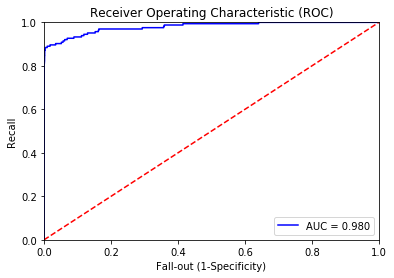

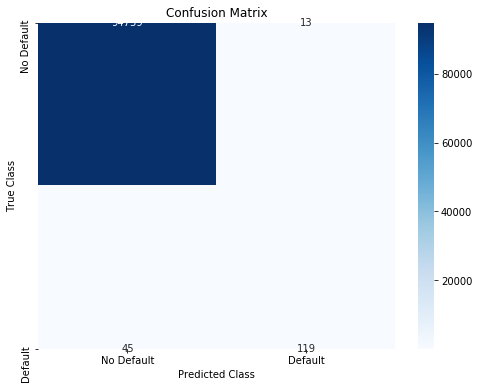

AUC(ROC): 0.8627362923905691
Precision: 0.9015151515151515
Recall: 0.725609756097561
F1 score: 0.8040540540540541
False positives: 13
True positives: 119
False negatives: 45
True negatives: 94759
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379088, 30)
After OverSampling, the shape of train_y: (379088,) 

After OverSampling, counts of label '1': 189544
After OverSampling, counts of label '0': 189544
Train on 189872 samples, validate on 94935 samples
Epoch 1/150
189872/189872 [==============================] - 20s 107us/step - loss: 0.0022 - val_loss: 3.7668e-04
Epoch 2/150
189872/189872 [==============================] - 20s 103us/step - loss: 2.7595e-04 - val_loss: 1.9653e-04
Epoch 3/150
189872/189872 [==============================] - 20s 103us/step - loss: 1.7341e-04 - val_loss: 1.6113e-04
Epoch 4/150
189872/189872 [==============================] - 20s 104us/step - loss: 1.3440e-04 - val_loss: 1.3319e-04
Epoch 5/150
189872/189872 [==============================] - 20s 103us/step - loss: 1.2135e-04 - val_loss: 1.1860e-04
Epoch 6/150
189872/189872 [==============================] - 19s 103us/step - loss: 1.1383e-04 - val_loss: 1.1272e-04
Epoch 7/150
189872/189872 [=============

Epoch 92/150
189872/189872 [==============================] - 20s 104us/step - loss: 3.4761e-05 - val_loss: 3.4652e-05
Epoch 93/150
189872/189872 [==============================] - 20s 104us/step - loss: 3.4617e-05 - val_loss: 3.8298e-05
Epoch 94/150
189872/189872 [==============================] - 20s 103us/step - loss: 3.4644e-05 - val_loss: 3.8785e-05
Epoch 95/150
189872/189872 [==============================] - 19s 98us/step - loss: 3.3828e-05 - val_loss: 3.0673e-05
Epoch 102/150
189872/189872 [==============================] - 18s 97us/step - loss: 3.3800e-05 - val_loss: 3.4131e-05
Epoch 103/150
189872/189872 [==============================] - 18s 97us/step - loss: 3.3748e-05 - val_loss: 6.2231e-05
Epoch 104/150
189872/189872 [==============================] - 18s 97us/step - loss: 3.3692e-05 - val_loss: 2.9891e-05
Epoch 105/150
189872/189872 [==============================] - 19s 98us/step - loss: 3.3067e-05 - val_loss: 3.4549e-05
Epoch 113/150
189872/189872 [====================

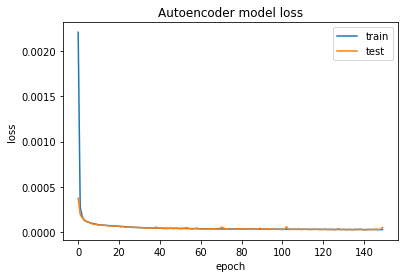

Train on 189872 samples, validate on 94935 samples
Epoch 1/50
189872/189872 [==============================] - 46s 241us/step - loss: 0.0589 - accuracy: 0.9796 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 2/50
189872/189872 [==============================] - 45s 238us/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 3/50
189872/189872 [==============================] - 45s 235us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 4/50
189872/189872 [==============================] - 44s 233us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 5/50
189872/189872 [==============================] - 45s 235us/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 6/50
189872/189872 [==============================] - 44s 234us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/50
189872/189872 [=================

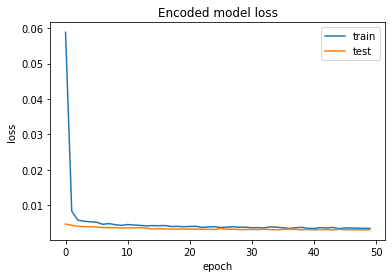

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993995891926055


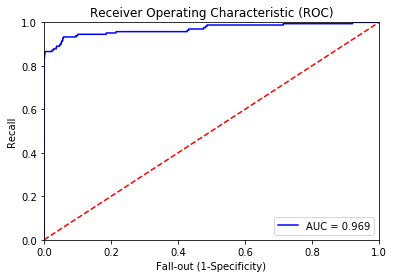

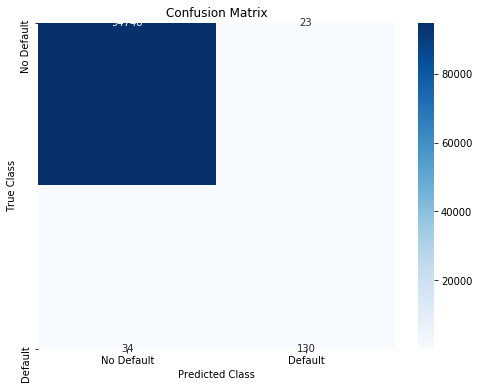

AUC(ROC): 0.8962201182774087
Precision: 0.8496732026143791
Recall: 0.7926829268292683
F1 score: 0.8201892744479496
False positives: 23
True positives: 130
False negatives: 34
True negatives: 94748


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 94753.66666666667
 Average fp = 18.0
 Average fn = 38.666666666666664
 Average tp = 125.33333333333333
 Average Precision = 0.8744186046511628
 Average Recall = 0.7642276422764227
 Average F1 score = 0.8156182212581344


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284261
 Total fp: 54
 Total fn: 116
 Total tp: 376
 Total Precision = 0.8744186046511628
 Total Recall = 0.7642276422764228
 Total F1_score = 0.8156182212581347


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 15526.250787734985 seconds ---
15526.251787662506


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

4.31284771879514
